In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MDAnalysis as mda
import pyrexMD.core as core
import pyrexMD.misc as misc
import pyrexMD.topology as top
import pyrexMD.analysis.analysis as ana
import pyrexMD.analysis.contacts as con

# Native Contact Analyses

In [2]:
### define MDAnalysis universes to handle data. 
### in this case we just want to compare two different conformations and have no trajectory data

pdb1 = "files/contacts/1vii_ref.pdb"
pdb2 = "files/contacts/1vii_unfolded_frame.pdb"

u1 = mda.Universe(pdb1)
u2 = mda.Universe(pdb2)

In [3]:
### check models via trajectory viewer

tv1 = core.iPlayer(u1)
tv1()

tv2 = core.iPlayer(u2)
tv2()

In [4]:
### get native contacts and save log file
# NC: native contacts (unique RES pairs)
# NC_d: detailed list of NCs containing (RES pairs), (ATOM numbers), (ATOM names)

NC, NC_d = con.get_Native_Contacts(u1, d_cutoff=6.0, sel="protein", save_as="files/contacts/1vii_native.txt")

Norming res ids...
Saved file as: /home/arthur/Dropbox/#PhD/#my_scripts/myPKG/pyrexMD/pyrexMD/examples/files/contacts/1vii_native.txt


In [5]:
NC

[(1, 6),
 (1, 15),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 10),
 (2, 11),
 (2, 15),
 (2, 33),
 (2, 34),
 (2, 35),
 (2, 36),
 (3, 7),
 (3, 8),
 (3, 15),
 (4, 8),
 (4, 9),
 (4, 14),
 (4, 15),
 (5, 9),
 (5, 10),
 (6, 10),
 (6, 11),
 (6, 36),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (7, 18),
 (8, 12),
 (8, 13),
 (10, 33),
 (10, 34),
 (10, 35),
 (10, 36),
 (11, 15),
 (11, 18),
 (11, 26),
 (11, 29),
 (11, 30),
 (11, 33),
 (11, 34),
 (11, 35),
 (13, 17),
 (13, 18),
 (14, 18),
 (14, 19),
 (15, 19),
 (15, 20),
 (16, 20),
 (17, 21),
 (18, 25),
 (18, 26),
 (18, 27),
 (18, 28),
 (18, 29),
 (18, 30),
 (19, 26),
 (20, 26),
 (21, 25),
 (21, 26),
 (21, 29),
 (22, 26),
 (22, 27),
 (23, 27),
 (23, 28),
 (24, 28),
 (24, 29),
 (25, 29),
 (25, 30),
 (26, 30),
 (26, 31),
 (27, 31),
 (27, 32),
 (28, 32),
 (28, 33),
 (29, 33),
 (29, 34),
 (29, 35),
 (30, 34),
 (30, 35),
 (31, 35)]

In [6]:
NC_d

[[(1, 6), (19, 81), ('O', 'CB')],
 [(1, 15), (5, 230), ('CA', 'CZ')],
 [(2, 6), (20, 81), ('N', 'CB')],
 [(2, 7), (22, 89), ('CA', 'N')],
 [(2, 8), (33, 109), ('CD2', 'N')],
 [(2, 10), (24, 145), ('CB', 'CB')],
 [(2, 11), (24, 171), ('CB', 'CE2')],
 [(2, 15), (20, 225), ('N', 'CD')],
 [(2, 33), (33, 548), ('CD2', 'C')],
 [(2, 34), (20, 556), ('N', 'O')],
 [(2, 35), (27, 557), ('CG', 'N')],
 [(2, 36), (24, 596), ('CB', 'OC2')],
 [(3, 7), (39, 89), ('N', 'N')],
 [(3, 8), (48, 109), ('C', 'N')],
 [(3, 15), (39, 230), ('N', 'CZ')],
 [(4, 8), (52, 109), ('CA', 'N')],
 [(4, 9), (61, 131), ('O', 'N')],
 [(4, 14), (57, 207), ('CG', 'CG2')],
 [(4, 15), (50, 231), ('N', 'NH1')],
 [(5, 9), (64, 131), ('CA', 'N')],
 [(5, 10), (76, 141), ('O', 'N')],
 [(6, 10), (77, 151), ('N', 'CG2')],
 [(6, 11), (88, 157), ('O', 'N')],
 [(6, 36), (86, 594), ('OD2', 'C')],
 [(7, 11), (89, 173), ('N', 'CD2')],
 [(7, 12), (96, 177), ('CG', 'N')],
 [(7, 13), (91, 200), ('CA', 'O')],
 [(7, 14), (93, 203), ('CB', 'CA')

<IPython.core.display.Javascript object>


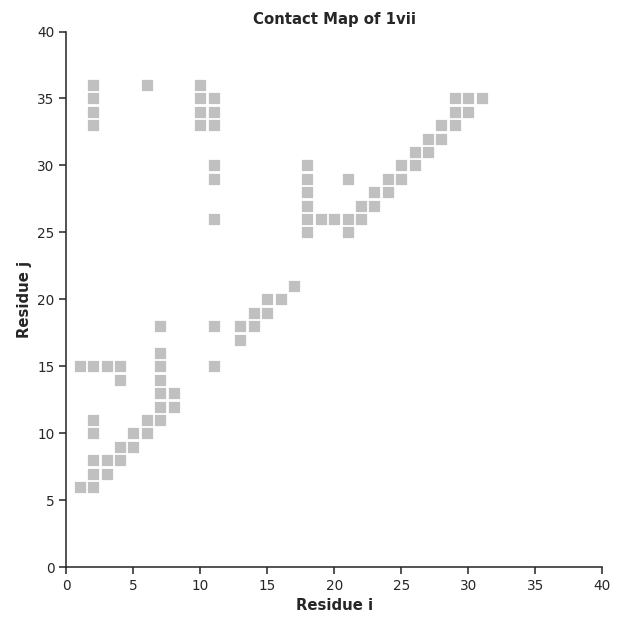

Plotting native contacts...


In [7]:
### plot native contacts

fig, ax = con.plot_Contact_Map(u1, sel="protein")

<IPython.core.display.Javascript object>


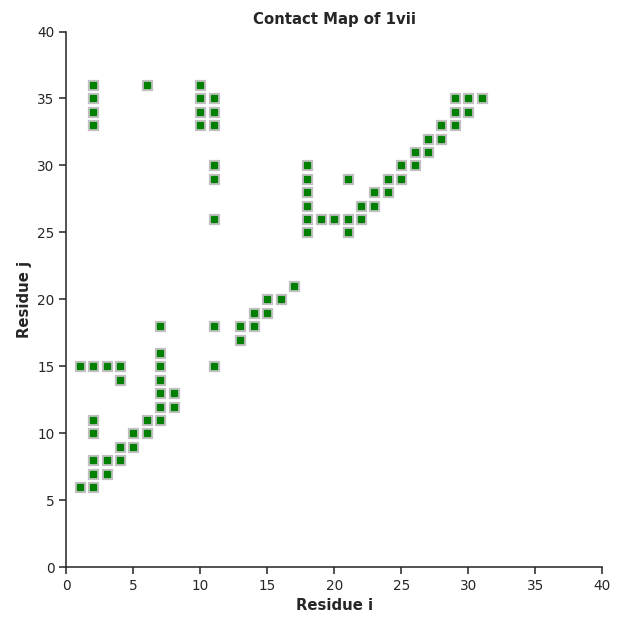

Plotting native contacts...


In [8]:
### plot native contacts and compare with contacts from input file 
# (grey=native, green=native and in file, red=nonnative and in file)

fig, ax = con.plot_Contact_Map(u1, DCA_fin="files/contacts/1vii_native_contacts.txt", n_DCA=None)

<IPython.core.display.Javascript object>


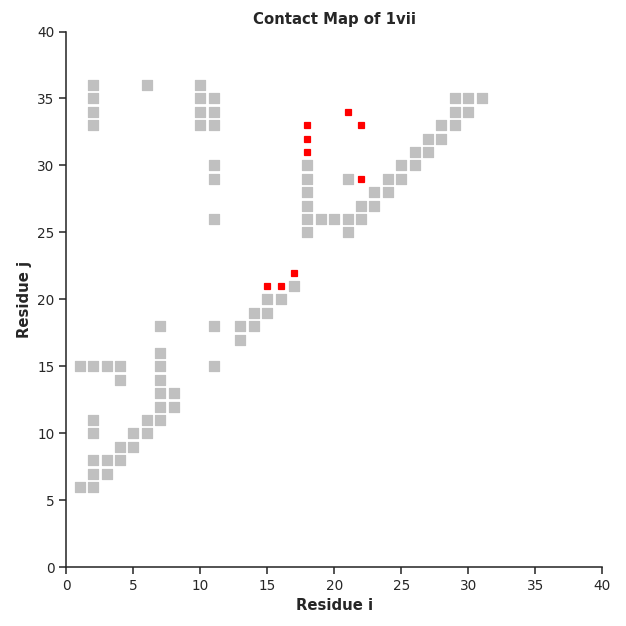

Plotting native contacts...


In [9]:
### test plot function for a set of nonnative contacts
# (grey=native, green=native and in file, red=nonnative and in file)

fig, ax = con.plot_Contact_Map(u1, DCA_fin="files/contacts/1vii_nonnative_contacts.txt", n_DCA=None)

Norming res ids...


<IPython.core.display.Javascript object>


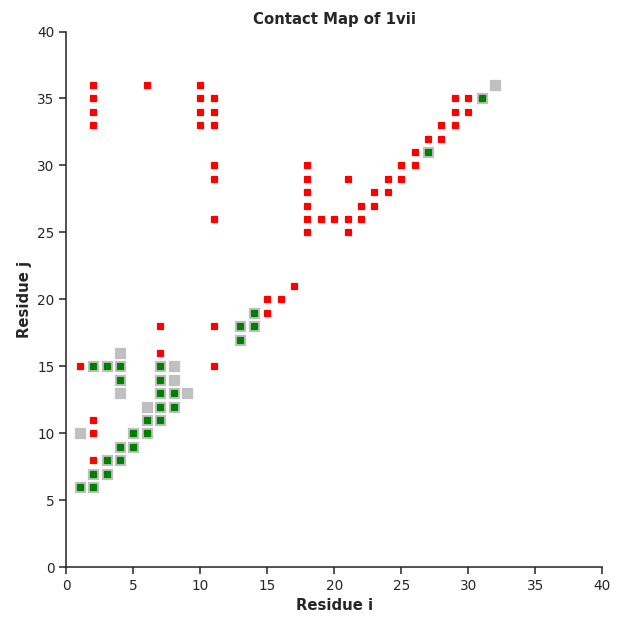

Plotting native contacts...


In [10]:
### use plot function to comapare the two different conformations by using native contacts from log file
# green=native contacts in both models
# red=native contact only in u2 (unfolded)  -> contacts broke up
# grey=native contact only in u2 (unfolded) -> new formed contact

fig, ax = con.plot_Contact_Map(u2, DCA_fin="files/contacts/1vii_native_contacts.txt", n_DCA=None)

In [20]:
### get native contact distances
# NC: native contacts
# NC_dist: native contact distances
# DM: distance matrices

NC, NC_dist, DM = con.get_NC_distances(u1, u1, sel="protein", d_cutoff=6.0)

In [28]:
### print table with distance and pairs

misc.cprint("distance  NC pair", "blue")
_ = misc.print_table([NC_dist, NC], spacing=10)

distance  NC pair
5.649     (1, 6)
4.986     (1, 15)
4.221     (2, 6)
3.525     (2, 7)
5.79      (2, 8)
3.383     (2, 10)
3.541     (2, 11)
2.84      (2, 15)
5.703     (2, 33)
2.93      (2, 34)
4.926     (2, 35)
3.797     (2, 36)
2.897     (3, 7)
4.826     (3, 8)
4.957     (3, 15)
2.924     (4, 8)
5.314     (4, 9)
5.477     (4, 14)
5.769     (4, 15)
3.318     (5, 9)
5.481     (5, 10)
2.844     (6, 10)
5.386     (6, 11)
5.195     (6, 36)
2.561     (7, 11)
3.996     (7, 12)
2.809     (7, 13)
2.851     (7, 14)
2.858     (7, 15)
5.387     (7, 16)
misc.print_table(): printed only 30 entries (set by verbose_stop parameter).


<IPython.core.display.Javascript object>


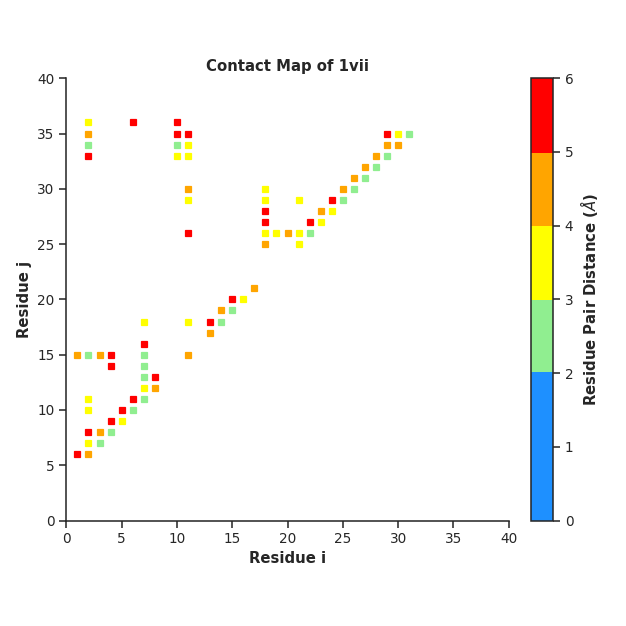

In [17]:
### plot contact map with native contact distances
#(grey = distance larger than highest color threshold)

fig, ax = con.plot_Contact_Map_Distances(u1, NC, NC_dist, pdbid="1vii", sel="protein")

In [ ]:
# plot True Positive Rate (TPR): 
# test file contains: 10 native -> 10 nonnative -> rest native 
con.plot_DCA_TPR(u1, DCA_fin="files/contacts/1vii_mixed_contacts.txt", n_DCA=80)

# QNative Analysis

In [ ]:
ref = "files/traj/2hba_ChainB_ref.pdb"
top = "files/traj/traj_protein.tpr"
traj = "files/traj/traj_protein.xtc"
u1 = mda.Universe(top,traj)   # mobile
u2 = mda.Universe(ref)        # reference

tv1 = core.iPlayer(u1)
tv1()
tv2 = core.iPlayer(u2)
tv2()

In [ ]:
FRAMES, QNATIVE = con.get_QNative(u1,u2, method="radius_cut", sel="protein and name CA")

In [ ]:
NC, NC_d = con.get_Native_Contacts(u1, sel="protein and name CA")
NC

# QBias Analysis

In [ ]:
ref = "files/traj/2hba_ChainB_ref.pdb"
top = "files/traj/traj_protein.tpr"
traj = "files/traj/traj_protein.xtc"
u1 = mda.Universe(top,traj)   # mobile
u2 = mda.Universe(ref)        # reference

sel= "protein and name CA"
NC, NC_d = con.get_Native_Contacts(u2, sel=sel)

In [ ]:
# test get_QBias(): use native contacts AND selfcontacts as bias contacts. Compare with get_QNative()

FRAMES, QBIAS, CM = con.get_QBias(u1, NC, d_cutoff=6.0, include_selfcontacts=True, warn=True)
print(QNATIVE - QBIAS)

In [ ]:
# test get_QBias(): use native contacts as bias contacts. Compare with get_QNative()

FRAMES, QBIAS, CM = con.get_QBias(u1, NC, d_cutoff=6.0, include_selfcontacts=False, warn=False)
misc.cprint("Comparison: QNative - QBias", "blue")
print(QNATIVE - QBIAS)

In [ ]:
# extract formed contact pairs for first frame
CP = con.get_formed_contactpairs(u1, CM[0], include_selfcontacts=False)
CP

# Interactive Plots

In [ ]:
# create interactive plot: ctrl-click into plot to jump to specific frames
IP = core.iPlot(u1, xdata=FRAMES, ydata=QBIAS, xlabel="frame", ylabel="Qbias")
IP()